# Import Library

Library yang digunakan pada proyek ini adalah sebagai berikut:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt
from sklearn import preprocessing
import math
import time
from pandas import to_datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from tensorflow import keras
from tensorflow.keras import layers

# Masuk Pada Dataset

Menggunakan dataset

In [2]:
#Menginisialisasi dataset ke dalam variabel df
df = pd.read_csv("BBCA.csv")

#Untuk mengetahui values dari dataset
df.isnull().values.any()

False

Menampilkan bagian atas dari dataset

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-06-08,175.0,180.0,175.0,177.5,105.656067,499150000
1,2004-06-09,177.5,182.5,175.0,180.0,107.144203,294290000
2,2004-06-10,180.0,180.0,177.5,180.0,107.144203,165590000
3,2004-06-11,177.5,180.0,177.5,180.0,107.144203,135830000
4,2004-06-14,180.0,180.0,175.0,177.5,105.656067,158540000


# Eksplorasi Data

merujuk ke df, yang merupakan representasi dari objek pandas dataframe.


In [4]:
type(df)

pandas.core.frame.DataFrame

Mengecek dataset untuk data null.


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Menghapus kolom yang tidak digunakan dengan menggunakan drop

In [6]:
df = df.drop(['Adj Close', 'Volume'], axis='columns')

In [7]:
#Menampilkan head data setelah menghapus kolom 'Adj Close' dan 'Volume'
df.head()

,Date,Open,High,Low,Close
0,2004-06-08,175.0,180.0,175.0,177.5
1,2004-06-09,177.5,182.5,175.0,180.0
2,2004-06-10,180.0,180.0,177.5,180.0
3,2004-06-11,177.5,180.0,177.5,180.0
4,2004-06-14,180.0,180.0,175.0,177.5


Menampilkan tipe data dari sisa kolom dataset


In [8]:
print(df.dtypes)

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


In [9]:
df

,Date,Open,High,Low,Close
0,2004-06-08,175.0,180.0,175.0,177.5
1,2004-06-09,177.5,182.5,175.0,180.0
2,2004-06-10,180.0,180.0,177.5,180.0
3,2004-06-11,177.5,180.0,177.5,180.0
4,2004-06-14,180.0,180.0,175.0,177.5
...,...,...,...,...,...
4868,2024-01-29,9400.0,9550.0,9375.0,9550.0
4869,2024-01-30,9500.0,9650.0,9475.0,9650.0
4870,2024-01-31,9700.0,9700.0,9550.0,9550.0
4871,2024-02-01,9650.0,9725.0,9575.0,9700.0


Mengubah tanggal menjadi index

In [10]:
con = df['Date']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#check datatype of index
df.index

DatetimeIndex(['2004-06-08', '2004-06-09', '2004-06-10', '2004-06-11',
               '2004-06-14', '2004-06-15', '2004-06-16', '2004-06-17',
               '2004-06-18', '2004-06-21',
               ...
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02'],
              dtype='datetime64[ns]', name='Date', length=4873, freq=None)

In [11]:
df

,Open,High,Low,Close
Date,,,,
2004-06-08,175.0,180.0,175.0,177.5
2004-06-09,177.5,182.5,175.0,180.0
2004-06-10,180.0,180.0,177.5,180.0
2004-06-11,177.5,180.0,177.5,180.0
2004-06-14,180.0,180.0,175.0,177.5
...,...,...,...,...
2024-01-29,9400.0,9550.0,9375.0,9550.0
2024-01-30,9500.0,9650.0,9475.0,9650.0
2024-01-31,9700.0,9700.0,9550.0,9550.0


Menginisialkan variable data time series

In [12]:
hg = pd.Series(df['High'])
op = pd.Series(df['Open'])
lw = pd.Series(df['Low'])
cl = pd.Series(df['Close'])

# Visualization Data

Memvisualisasikan data dari kolom yang tidak didrop sebelumnya


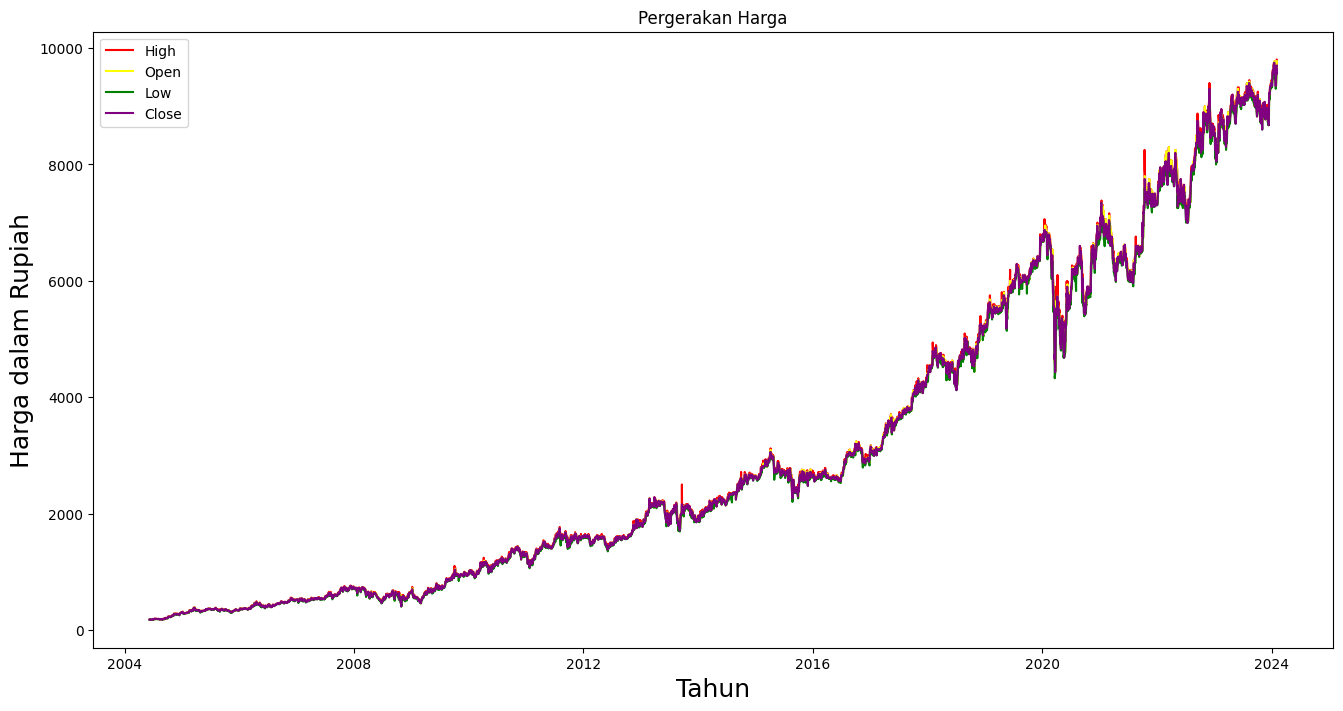

In [13]:
#Visualisasi Dataset

plt.figure(figsize=(16,8))
plt.title('Pergerakan Harga')
plt.plot(hg, color = 'red', label = 'High')
plt.plot(op, color = 'yellow', label = 'Open')
plt.plot(lw, color = 'green', label = 'Low')
plt.plot(cl, color = 'purple', label = 'Close')
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Harga dalam Rupiah', fontsize=18)
plt.legend(loc='best')
plt.show()

Membuat data frame dari kolom 'High' dan membuat data train & test

In [14]:
data = pd.DataFrame(df['High'])

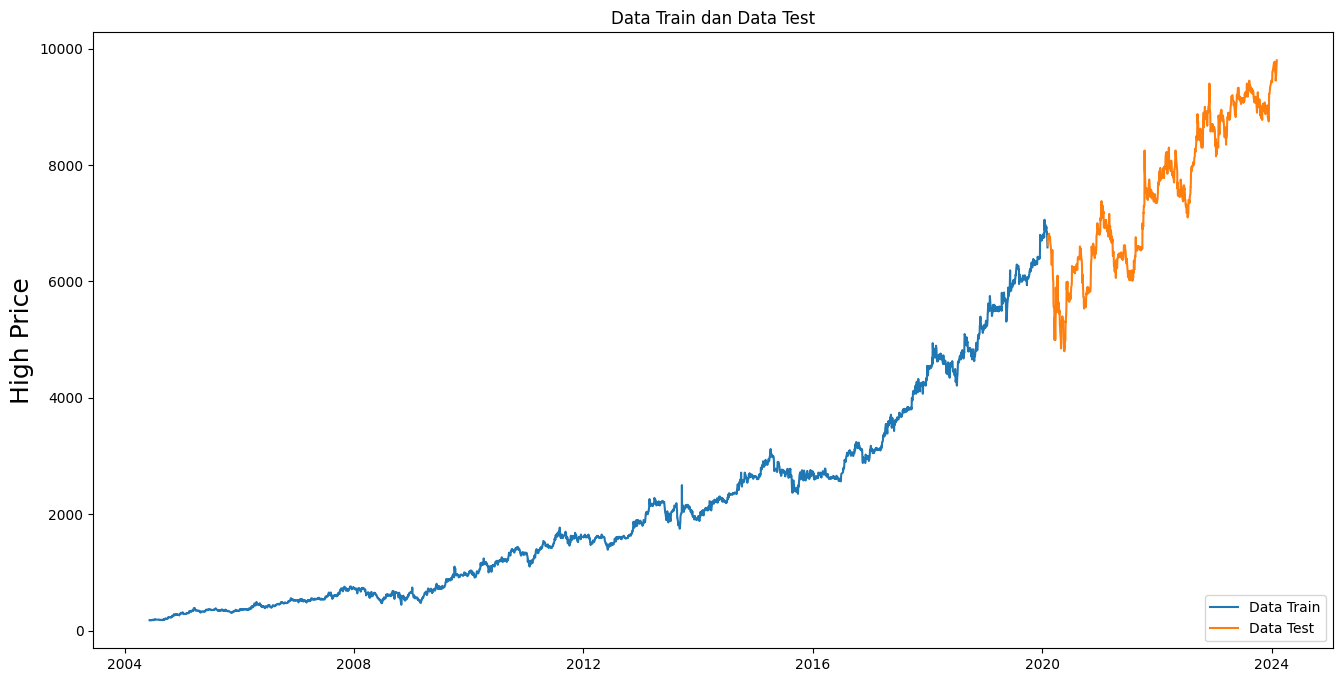

In [15]:
df_train = data[0:int(len(data)*0.8)]
df_test = data[int(len(data)*0.8):]
# plot the data
# Visualisasi data
plt.figure(figsize=(16,8))
plt.title('Data Train dan Data Test')
plt.ylabel('High Price', fontsize=18)
plt.plot(df_train)
plt.plot(df_test)
plt.legend(['Data Train', 'Data Test'], loc='lower right')
plt.show()

# Preprocessing

Melakukan scaling data dengan kolom High.


In [16]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df['High'].values.reshape(-1, 1))

Memecah data menjadi data train dan data test

In [17]:
dataset[0:10]

array([[0.00025981],
       [0.00051962],
       [0.00025981],
       [0.00025981],
       [0.00025981],
       [0.00051962],
       [0.00051962],
       [0.        ],
       [0.        ],
       [0.        ]])

In [18]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3898 975


In [19]:
#Menampilkan panjang/jumlah dataframe
print(len(df))

4873


Konversi nilai array ke dalam kumpulan matriks


In [20]:
def create_dataset(dataset, look_back=15):
    x, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        x.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(x), np.array(y)

In [21]:
look_back = 15
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3882, 15)
(3882,)
(959, 15)
(959,)


Reshape input menjadi 3D yaitu [samples, time step, dan feature]

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Model

Membuat model LSTM

In [24]:
look_back = 15

model1 = Sequential()

model1.add(LSTM(50, input_shape=(1, look_back), return_sequences=False))

# Dropout to prevent overfitting
model1.add(Dropout(0.5))

# Dense layer for classification output
model1.add(Dense(units=1, activation='tanh'))

# Optimizing the neural network weights
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compiling the model with the optimizer
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=100, batch_size=64, verbose=2, validation_data=(x_test, y_test))


Epoch 1/100
61/61 - 3s - loss: 0.4381 - accuracy: 0.0000e+00 - val_loss: 0.5249 - val_accuracy: 0.0000e+00 - 3s/epoch - 50ms/step
Epoch 2/100
61/61 - 0s - loss: 0.4054 - accuracy: 0.0000e+00 - val_loss: 0.5242 - val_accuracy: 0.0000e+00 - 202ms/epoch - 3ms/step
Epoch 3/100
61/61 - 0s - loss: 0.4041 - accuracy: 0.0000e+00 - val_loss: 0.5204 - val_accuracy: 0.0000e+00 - 165ms/epoch - 3ms/step
Epoch 4/100
61/61 - 0s - loss: 0.4030 - accuracy: 0.0000e+00 - val_loss: 0.5124 - val_accuracy: 0.0000e+00 - 254ms/epoch - 4ms/step
Epoch 5/100
61/61 - 0s - loss: 0.4027 - accuracy: 0.0000e+00 - val_loss: 0.5111 - val_accuracy: 0.0000e+00 - 139ms/epoch - 2ms/step
Epoch 6/100
61/61 - 0s - loss: 0.4024 - accuracy: 0.0000e+00 - val_loss: 0.5127 - val_accuracy: 0.0000e+00 - 206ms/epoch - 3ms/step
Epoch 7/100
61/61 - 0s - loss: 0.4022 - accuracy: 0.0000e+00 - val_loss: 0.5132 - val_accuracy: 0.0000e+00 - 164ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.4023 - accuracy: 0.0000e+00 - val_loss: 0.510

In [25]:
mseplot = model1.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

mseplot = model1.fit(x_train, y_train, epochs = 100, batch_size=64, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
61/61 - 3s - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0928 - val_mse: 0.0928 - 3s/epoch - 46ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0909 - val_mse: 0.0909 - 211ms/epoch - 3ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0897 - val_mse: 0.0897 - 148ms/epoch - 2ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0888 - val_mse: 0.0888 - 189ms/epoch - 3ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0879 - val_mse: 0.0879 - 203ms/epoch - 3ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0855 - val_mse: 0.0855 - 207ms/epoch - 3ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0868 - val_mse: 0.0868 - 215ms/epoch - 4ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0853 - val_mse: 0.0853 - 236ms/epoch - 4ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0833 - val_mse: 0.0833 -

In [26]:
model1.compile(loss='mse', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

rmseplot = model1.fit(x_train, y_train, epochs = 100, batch_size=64, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
61/61 - 2s - loss: 0.0035 - rmse: 0.0594 - val_loss: 0.0407 - val_rmse: 0.2017 - 2s/epoch - 32ms/step
Epoch 2/100
61/61 - 0s - loss: 0.0038 - rmse: 0.0616 - val_loss: 0.0394 - val_rmse: 0.1986 - 181ms/epoch - 3ms/step
Epoch 3/100
61/61 - 0s - loss: 0.0037 - rmse: 0.0611 - val_loss: 0.0373 - val_rmse: 0.1931 - 206ms/epoch - 3ms/step
Epoch 4/100
61/61 - 0s - loss: 0.0038 - rmse: 0.0619 - val_loss: 0.0386 - val_rmse: 0.1965 - 204ms/epoch - 3ms/step
Epoch 5/100
61/61 - 0s - loss: 0.0037 - rmse: 0.0610 - val_loss: 0.0367 - val_rmse: 0.1915 - 254ms/epoch - 4ms/step
Epoch 6/100
61/61 - 0s - loss: 0.0039 - rmse: 0.0622 - val_loss: 0.0428 - val_rmse: 0.2069 - 233ms/epoch - 4ms/step
Epoch 7/100
61/61 - 0s - loss: 0.0037 - rmse: 0.0611 - val_loss: 0.0366 - val_rmse: 0.1912 - 209ms/epoch - 3ms/step
Epoch 8/100
61/61 - 0s - loss: 0.0037 - rmse: 0.0608 - val_loss: 0.0389 - val_rmse: 0.1974 - 206ms/epoch - 3ms/step
Epoch 9/100
61/61 - 0s - loss: 0.0037 - rmse: 0.0605 - val_loss: 0.0391 - 

In [27]:
score = model1.evaluate(x_train, y_train, batch_size = 32, verbose = 2)
print('Train Accuracy:', score[1])

122/122 - 0s - loss: 9.5639e-04 - rmse: 0.0309 - 171ms/epoch - 1ms/step
Train Accuracy: 0.030925557017326355


# Tuning Test

Membuat tuning test dari hasil model yang telah dibuat dengan menggunakan perbandingan yang lainnya

In [28]:
print("Shape x_train:", x_train.shape)
# Output: (jumlah_sampel, timesteps, features)

# Misalkan y_train adalah dataset target
print("Shape y_train:", y_train.shape)
# Output: (jumlah_sampel,)

# Ambil nilai timesteps dari x_train
timesteps = x_train.shape[1]
print("Timesteps:", timesteps)

# Ambil nilai features dari x_train
features = x_train.shape[2]
print("Features:", features)


Shape x_train: (3882, 1, 15)
Shape y_train: (3882,)
Timesteps: 1
Features: 15


In [29]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Placeholder values for timesteps and features
timesteps = 1
features = 15

# Fungsi untuk membuat model LSTM
def create_model(units=50, activation='tanh', optimizer='opt'):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(timesteps, features)))
    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Membuat objek KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Mendefinisikan hyperparameter yang ingin diuji
param_grid = {
    'units': [50, 100, 200],
    'activation': ['tanh', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Melakukan proses tuning dengan fit
grid_search.fit(x_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Menampilkan skor akurasi terbaik
print("Skor akurasi terbaik:", grid_search.best_score_)

C:\Users\Alfaisal\AppData\Local\Temp\ipykernel_15684\3761055048.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


122/122 [==============================] - 2s 3ms/step - loss: -1847.3347 - accuracy: 0.0015
Parameter terbaik: {'activation': 'tanh', 'optimizer': 'adam', 'units': 50}
Skor akurasi terbaik: 0.1369369387626648


# Visualisasi Model LSTM

In [30]:
train_predict = model1.predict(x_train)
test_predict = model1.predict(x_test)


# #invert prediksi

train_predict = min_max_scaler.fit_transform(train_predict)
y_train = min_max_scaler.inverse_transform([y_train])

test_predict = min_max_scaler.inverse_transform(test_predict)
y_test = min_max_scaler.inverse_transform([y_test])

#kalkulasi untuk root mean squared error

train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train score: %.2f RMSE' % (train_score))

test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test score: %.2f RMSE' % (test_score))

#hitung MSE
train_score1 = mean_squared_error(y_train[0], train_predict[:,0])
print('Train score: %.2f MSE' % (train_score1))

test_score1 = mean_squared_error(y_test[0], test_predict[:,0])
print('Train score: %.2f MSE' % (test_score1))

30/30 [==============================] - 0s 1ms/step
Train score: 0.26 RMSE
Test score: 0.11 RMSE
Train score: 0.07 MSE
Train score: 0.01 MSE


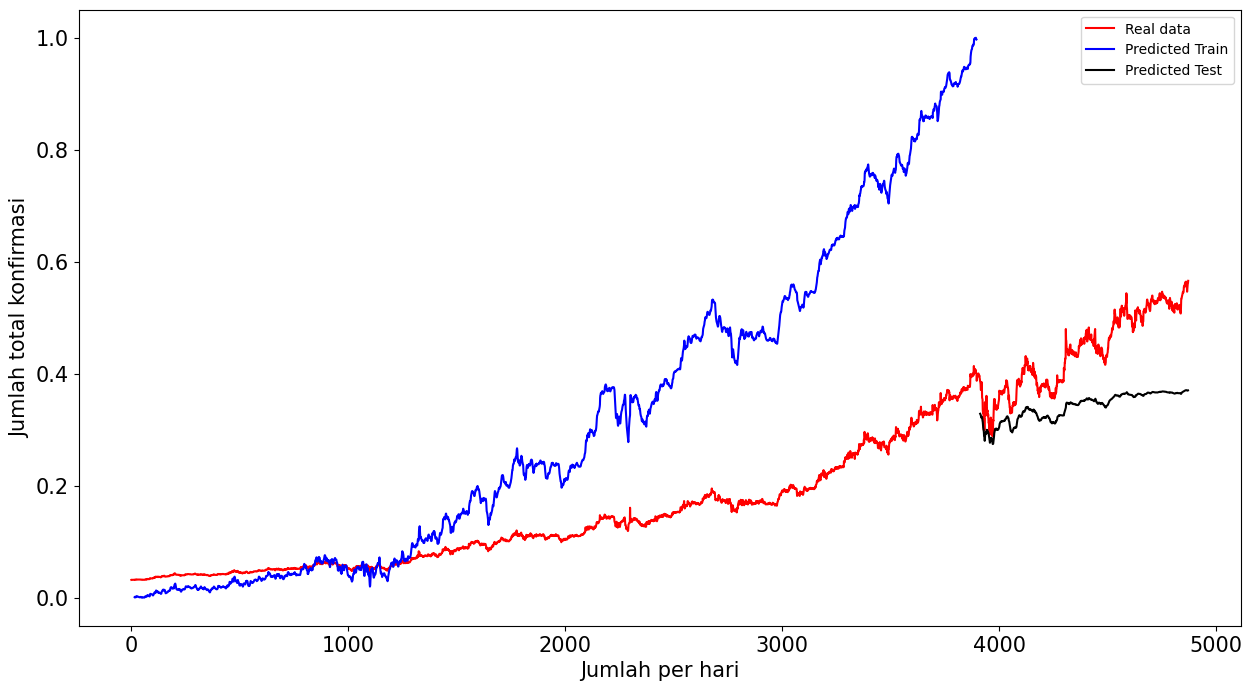

In [31]:
#plotting untuk train prediction
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# plotting untuk test prediction
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

#plot
plt.figure(figsize=(15, 8))
plt.plot(min_max_scaler.inverse_transform(dataset), color='r', label='Real data')
plt.plot(train_predict_plot, color='b', label='Predicted Train')
plt.plot(test_predict_plot, color='black', label = 'Predicted Test')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Jumlah per hari", size=15)
plt.ylabel("Jumlah total konfirmasi", size=15)
plt.legend(loc='best')
plt.show()

# Kesimpulan

Untuk memprediksi saham, kami menggunakan dataset saham BBCA dari Yahoo Finance. Kami menggunakan algoritma LSTM untuk melakukan prediksi ini. Pada bagian awal, kami membuat visualisasi data dengan beberapa kolom, yaitu High, Open, Low, dan Close, tetapi kami hanya menggunakan kolom High. Setelah itu, kami membuat visualisasi antara data train dan test dari kolom High, dan kami melakukan scaling. Selain itu, kami menggunakan epochs:100 dan validasi datanya menggunakan tes X dan Y. Evaluasi model menghasilkan akurasi pelatihan sebesar 0.007017217110842466. Kami juga melakukan tuning test untuk menentukan parameter mana yang terbaik, meskipun masih rendah. Dan setelah tuning test selesai, parameter yang paling cocok untuk digunakan adalah tunh. Anda dapat membuat visualisasi model lstm dengan melakukan kalkulasi kesalahan rata-rata sederhana. Membuat plot untuk melihat visualisasi dari data asli dan data model lstm yang telah dibuat; secara keseluruhan, outputnya tidak mencapai 0, tetapi setidaknya menurut kami itu cukup baik karena perbedaannya tidak terlalu jauh untuk mendekati nol. Kami menemukan bahwa visualisasi tersebut membuat visualisasi MSE dan RMSE pada setiap waktu, yang berarti bahwa data yang dihasilkan tidak terlalu overfitting. Kami percaya bahwa, karena menghasilkan data yang baik, LSTM juga cukup baik digunakan untuk penerapan. Melakukan tuning test juga dapat digunakan untuk menentukan apakah model yang digunakan sesuai untuk digunakan, meskipun masih ada beberapa output yang belum sepenuhnya memenuhi.